<a href="https://colab.research.google.com/github/UlisesNuB/Actividad_4_regresion_lineal_y_logaritmica/blob/main/Actividad_4_Regresion_lienal_y_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalamos librería para análisis de variables categóricas  
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from funpymodeling.exploratory import freq_tbl

In [ ]:
from google.colab import files
files.upload()

In [ ]:
Microretailer = pd.read_excel('microretailer_mit_lift_lab_actualizado.xlsx')
Microretailer

In [ ]:
valores_nulos = Microretailer.isnull().sum()
valores_nulos

In [7]:
#Rellenamos nulos
Microretailer = Microretailer.fillna(method='ffill')

In [ ]:
valores_nulos = Microretailer.isnull().sum()
valores_nulos

In [9]:
Microretailer = Microretailer.fillna(method = 'bfill')

In [10]:
valores_nulos = Microretailer.isnull().sum().sum()
valores_nulos

0

In [ ]:
Microretailer

# **Outliers**

In [ ]:
#Filtro por columnas no consecutivas
filtro=Microretailer.iloc[:,[13,14,16,21,22,29,31,33,42,45,49,51,56,57,58,59,60,78,90]] #Columnas no consecutivas
filtro

In [ ]:
#Método aplicación Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = filtro

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print('Limite superior permitido', Limite_Superior_iqr)
print('Limite inferior permitido', Limite_Inferior_iqr)

In [14]:
outliers_iqr = filtro[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]

In [15]:
data2_iqr= filtro[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

In [ ]:
#Comprobamos outliers
valores_nulos=data2_iqr.isnull().sum()
valores_nulos

In [17]:
#Reemplazar valores atípicos (nulos) del dataframe con "mean"
data3_iqr = data2_iqr.copy()
data3_iqr = data2_iqr.fillna(round(data3_iqr.mean(),1))

In [ ]:
#Comprobamos outliers
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

# **Regresión lineal**

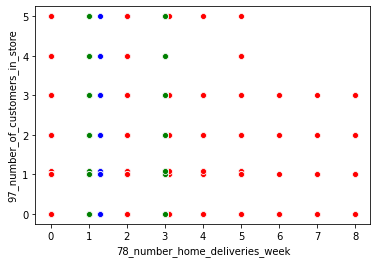

In [19]:
#Se grafican mapas de dispersión de las variables 3 variables
from turtle import color

sns.scatterplot(x='2_current_permanent_employees',y='97_number_of_customers_in_store',color='blue',data=data3_iqr)
sns.scatterplot(x='145_number_direct_competitors',y='97_number_of_customers_in_store',color='red',data=data3_iqr)
sns.scatterplot(x='78_number_home_deliveries_week',y='97_number_of_customers_in_store',color='green',data=data3_iqr)

In [20]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep= data3_iqr[['2_current_permanent_employees','145_number_direct_competitors','78_number_home_deliveries_week']]
Var_Dep = data3_iqr['97_number_of_customers_in_store']

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)

LinearRegression()

In [24]:
#Verificamos coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['2_current_permanent_employees', '145_number_direct_competitors',
        '78_number_home_deliveries_week'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.10392455, 0.03688242, 0.05415778]),
 '_residues': 525.1139121959028,
 'rank_': 3,
 'singular_': array([37.04957144, 16.86963103, 15.32478343]),
 'intercept_': 0.7640426930967733}

In [25]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Var_Indep,Var_Dep)

0.010436383550985084

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: alcohol, speeding y no previous
y_pred= model.predict(X=data3_iqr[['2_current_permanent_employees','145_number_direct_competitors','78_number_home_deliveries_week']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
data3_iqr.insert(0, 'Predicciones',y_pred)
data3_iqr

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predicho

sns.scatterplot(x='2_current_permanent_employees',y='97_number_of_customers_in_store',color='blue',data=data3_iqr)
sns.scatterplot(x='2_current_permanent_employees',y='Predicciones',color='red',data=data3_iqr)

In [29]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.010436383550985084

In [30]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.10215861956284004

# **Regresión logística**

In [31]:
#Verificamos información del DataFrame
Microretailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Columns: 106 entries, _record_id to 235_email
dtypes: float64(20), int64(2), object(84)
memory usage: 273.4+ KB


In [32]:
#Declaramos las variables dependientes e independientes para la regresión logística
Var_Indep = Microretailer[['145_number_direct_competitors','97_number_of_customers_in_store','268_number_fridges']]
Var_Dep = Microretailer['310_burnout']

In [33]:
#Redefinimos las variables
X = Var_Indep
y = Var_Dep

In [34]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

In [35]:
#Se escalan todos los datos
escalar = StandardScaler()

In [36]:
#Para realizar el escalamiento de las variables 'x' tanto de entrenamiento como de prueba, utilizamos
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [37]:
#Definimos al algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [38]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [39]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no'],
      dtype=object)

In [40]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(Matriz)

Matriz de Confusión
[[36  0]
 [28  2]]


In [41]:
#Cálculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='binary', pos_label='yes')
print('Precisión del modelo')
print(precision)

Precisión del modelo
1.0


In [42]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud)

Exactitud del modelo
0.5757575757575758


In [43]:
#Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average = 'binary', pos_label= 'yes')
print('Sensibilidad del modelo')
print(sensibilidad)

Sensibilidad del modelo
0.06666666666666667
